Which model is this? - dark_spoke_60im_300e_resnet34.json


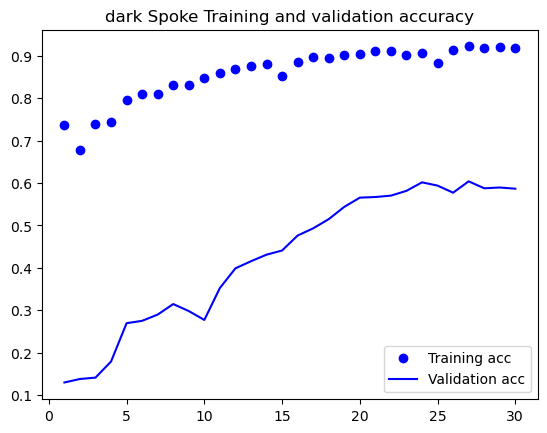

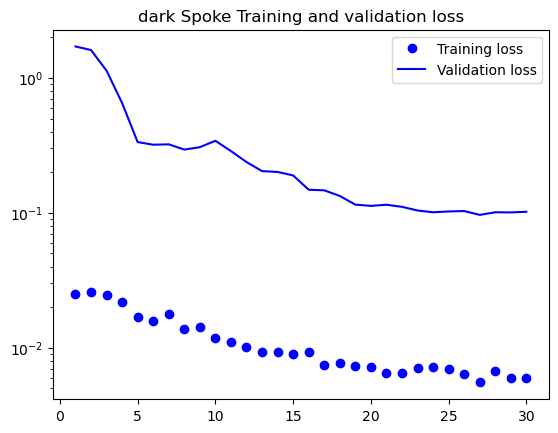

Last Train IOU Score:  0.9182584285736084
Last Train Loss Score:  0.005938337650150061
Last Validation IOU Score:  0.5866061449050903
Last Validation Loss Score:  0.10177682340145111


In [3]:
import model_utility
model_utility.display_results("../model/dark_spoke_60im_300e_resnet34.json")

In [1]:
import preprocess_filter
import glob
import sys
import matplotlib.pyplot as plt
import cv2
import scipy.io as io
import copy
import glob


sys.path.insert(1, '../../Research2022/spokes/src')
import spoketools

Yugadeep_compare = glob.glob("../data/2023_rpjb/good/*/W1602458618*.rpjb")
Yugadeep_compare

['../data/2023_rpjb/good/088_SPKMVLFLP/W1602458618_1_CALIB.rpjb']

Y: 39, 357
X: 507, 1523


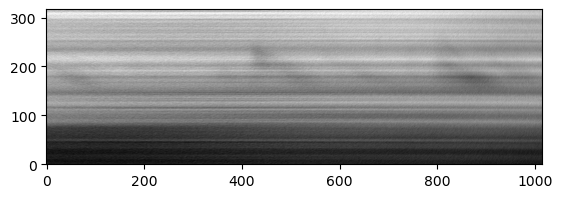

In [8]:
idl = io.readsav(Yugadeep_compare[0])
pixel_values = idl.rrpi
pixel_values=copy.copy(pixel_values)


y, x = pixel_values.shape
pixel_values = preprocess_filter.remove_cosmic_rays(pixel_values)
flt = pixel_values.flatten()
p_std = flt.std()
p_m = flt.mean()
pixel_values[pixel_values < (p_m - p_std)] = 0

pixel_values, quant = preprocess_filter.apply_quantize(pixel_values)
LS = preprocess_filter.get_quant_stats(quant)


ybuffer = int(y*.1)
xbuffer = int(x*.05)
pixel_values = pixel_values[ybuffer:y-ybuffer, LS["x_start"]+xbuffer:LS["x_end"]-xbuffer]
print(f"Y: {ybuffer}, {y-ybuffer}")
print(f"X: {LS['x_start']+xbuffer}, {LS['x_end']-xbuffer}")



plt.imshow(pixel_values, origin = "lower", cmap = "gray")
plt.show()

# preprocess_filter.save_image("../data/vis_for_talk/yuga_compare_W1602458618_final_raw.png", pixel_values)



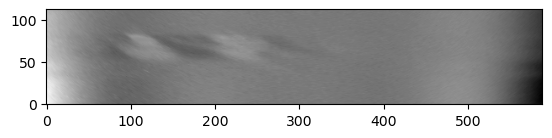

In [9]:
yugadeep_compare = glob.glob("../data/2023_rpjb/good/*/W1630638351*.rpjb")[0]

filename, pixel_values = preprocess_filter.apply_filters(yugadeep_compare)
pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)
# pixel_values = preprocess_filter.buffer_image(pixel_values, propper_x=736, propper_y=160)

plt.imshow(pixel_values, cmap = "gray", origin = "lower")
plt.show()

preprocess_filter.save_image("../data/vis_for_talk/W1630638351_full_cropped.png", pixel_values)


